# Seminar 2. Введение в pytorch

<img src="https://github.com/karfly/learning-deep-learning/raw/master/01_intro/static/pytorch-vs-numpy-logo.png" align="center"/>

References:
- [PyTorch tutorial by Jeremy Howard](https://pytorch.org/tutorials/beginner/nn_tutorial.html)

# PyTorch vs. NumPy

Библиотеки NumPy и PyTorch обе предоставляют функционал для научных вычислений (поддерживают многомерные массивы и высокопроизводительные матричные операции).

Однако для работы с нейронными сетями PyTorch гораздо лучше подходит, так как обладает двумя преимуществами:
 - pytorch имеет встроенный модуль для автоматического дифференцирования (autograd)
 - pytorch имеет поддержку вычислений на GPU.


In [1]:
!nvidia-smi

Thu Aug 15 06:37:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Установка

 - Option 1: ```pip install torch```
 - Option 2.1: ```conda install pytorch torchvision torchaudio cudatoolkit=12.0 -c pytorch``` (для версии с ГПУ)
 - Option 2.2: ```conda install pytorch torchvision torchaudio cpuonly -c pytorch``` (для ЦПУ)
 - Option 3: самостоятельная компиляция из исходного кода (```https://github.com/pytorch/pytorch#from-source ```)

# Начало работы

In [2]:
import torch
import torchvision

print("torch version:", torch.__version__)
print("torchvision version:", torchvision.__version__)

torch version: 2.3.1+cu121
torchvision version: 0.18.1+cu121


In [3]:
import numpy as np
print("numpy version:", np.__version__)

numpy version: 1.26.4


## Базовые операции в pytorch

### Создание массивов

NumPy:

In [4]:
x_numpy = np.array(
    [
        [1.0, 2.0, 3.0],
        [4.0, 5.0, 6.0],
        [7.0, 8.0, 9.0]
    ]
)

print("x_numpy = \n{}\n".format(x_numpy))

x_numpy = 
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]



In [6]:
type(x_numpy), x_numpy.dtype

(numpy.ndarray, dtype('float64'))

PyTorch:

In [7]:
x_torch = torch.tensor(
    [
        [1.0, 2.0, 3.0],
        [4.0, 5.0, 6.0],
        [7.0, 8.0, 9.0]
    ]
)

print("x_torch = \n{}\n".format(x_torch))

x_torch = 
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])



In [8]:
x_torch + x_numpy

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]], dtype=torch.float64)

In [9]:
type(x_torch.numpy()), type(x_torch)

(numpy.ndarray, torch.Tensor)

In [10]:
x_torch.dtype

torch.float32

In [11]:
x_torch_double = torch.tensor(
    [
        [1.0, 2.0, 3.0],
        [4.0, 5.0, 6.0],
        [7.0, 8.0, 9.0]
    ], dtype=torch.float64
)

In [12]:
x_torch_double

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)

### Индексация

NumPy:

In [13]:
print("x_numpy[0, 0] = \n{}\n".format(x_numpy[0][0]))
print("x_numpy[:, 0] = \n{}\n".format(x_numpy[:, 0]))
print("x_numpy[:2, 1:3] = \n{}\n".format(x_numpy[:2, 1:3]))

x_numpy[0, 0] = 
1.0

x_numpy[:, 0] = 
[1. 4. 7.]

x_numpy[:2, 1:3] = 
[[2. 3.]
 [5. 6.]]



PyTorch:

In [14]:
print("x_torch[0, 0] = \n{}\n".format(x_torch[0, 0]))
print("x_torch[:, 0] = \n{}\n".format(x_torch[:, 0]))
print("x_torch[:2, 1:3] = \n{}\n".format(x_torch[:2, 1:3]))

x_torch[0, 0] = 
1.0

x_torch[:, 0] = 
tensor([1., 4., 7.])

x_torch[:2, 1:3] = 
tensor([[2., 3.],
        [5., 6.]])



### Математические операции

In [16]:
x_numpy

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [17]:
x_numpy.mean()

5.0

In [19]:
x_numpy.mean(axis=1)

array([2., 5., 8.])

NumPy:

In [20]:
print("x_numpy ** 2 = \n{}\n".format(x_numpy ** 2)) # или np.square
print("np.cos(x_numpy) = \n{}\n".format(np.cos(x_numpy)))
print("x_numpy.mean(axis=0) = \n{}\n".format(x_numpy.mean(axis=0)))
print("x_numpy.T = \n{}\n".format(x_numpy.T))
print("x_numpy.reshape(1, -1) = \n{}\n".format(x_numpy.reshape(1, -1)))
print("x_numpy.flatten() = \n{}\n".format(x_numpy.flatten()))

x_numpy ** 2 = 
[[ 1.  4.  9.]
 [16. 25. 36.]
 [49. 64. 81.]]

np.cos(x_numpy) = 
[[ 0.54030231 -0.41614684 -0.9899925 ]
 [-0.65364362  0.28366219  0.96017029]
 [ 0.75390225 -0.14550003 -0.91113026]]

x_numpy.mean(axis=0) = 
[4. 5. 6.]

x_numpy.T = 
[[1. 4. 7.]
 [2. 5. 8.]
 [3. 6. 9.]]

x_numpy.reshape(1, -1) = 
[[1. 2. 3. 4. 5. 6. 7. 8. 9.]]

x_numpy.flatten() = 
[1. 2. 3. 4. 5. 6. 7. 8. 9.]



PyTorch:

In [21]:
print("x_torch ** 2 = \n{}\n".format(x_torch ** 2))
print("np.cos(x_torch) = \n{}\n".format(torch.cos(x_torch)))
print("x_torch.mean(dim=0) = \n{}\n".format(x_torch.mean(dim=0)))
print("x_torch.t() = \n{}\n".format(x_torch.t()))
print("x_torch.reshape(1, -1) = \n{}\n".format(x_torch.reshape(1, -1)))
print("x_torch.flatten() = \n{}\n".format(x_torch.flatten()))

x_torch ** 2 = 
tensor([[ 1.,  4.,  9.],
        [16., 25., 36.],
        [49., 64., 81.]])

np.cos(x_torch) = 
tensor([[ 0.5403, -0.4161, -0.9900],
        [-0.6536,  0.2837,  0.9602],
        [ 0.7539, -0.1455, -0.9111]])

x_torch.mean(dim=0) = 
tensor([4., 5., 6.])

x_torch.t() = 
tensor([[1., 4., 7.],
        [2., 5., 8.],
        [3., 6., 9.]])

x_torch.reshape(1, -1) = 
tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]])

x_torch.flatten() = 
tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])



### Разные массивы

NumPy:

np.arange(3) = 
[0 1 2]



In [23]:
print("np.arange(3) = \n{}\n".format(np.arange(3)))
print("np.linspace(0.0, 1.0, num=9).reshape(3, 3) = \n{}\n".format(np.linspace(0.0, 1.0, num=9).reshape(3, 3)))
print("np.ones() = \n{}\n".format(np.ones((2, 5))))
print("np.random.rand(3, 2) = \n{}\n".format(np.random.rand(3, 2)))
print("np.random.randn(3, 2) = \n{}\n".format(np.random.randn(3, 2)))

np.arange(3) = 
[0 1 2]

np.linspace(0.0, 1.0, num=9).reshape(3, 3) = 
[[0.    0.125 0.25 ]
 [0.375 0.5   0.625]
 [0.75  0.875 1.   ]]

np.ones() = 
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

np.random.rand(3, 2) = 
[[0.72516761 0.86694189]
 [0.39353444 0.64929623]
 [0.93456775 0.20887369]]

np.random.randn(3, 2) = 
[[-0.05015224 -0.62605982]
 [ 0.98833231 -0.08792362]
 [ 0.12641281  1.8127339 ]]



PyTorch:

In [24]:
print("torch.arange(3) = \n{}\n".format(torch.arange(3)))
print("torch.linspace(0.0, 1.0, steps=9).reshape(3, 3) = \n{}\n".format(torch.linspace(0.0, 1.0, steps=9).reshape(3, 3)))
print("torch.ones() = \n{}\n".format(torch.ones((2, 5))))
print("torch.rand(3, 2) = \n{}\n".format(torch.rand(3, 2)))
print("torch.randn(3, 2) = \n{}\n".format(torch.randn(3, 2)))

torch.arange(3) = 
tensor([0, 1, 2])

torch.linspace(0.0, 1.0, steps=9).reshape(3, 3) = 
tensor([[0.0000, 0.1250, 0.2500],
        [0.3750, 0.5000, 0.6250],
        [0.7500, 0.8750, 1.0000]])

torch.ones() = 
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

torch.rand(3, 2) = 
tensor([[0.6206, 0.5758],
        [0.9390, 0.8784],
        [0.7937, 0.9858]])

torch.randn(3, 2) = 
tensor([[ 0.0322,  0.2803],
        [-1.3109,  0.8286],
        [ 0.4820, -0.3697]])



### 2 arrays/tensors

NumPy:

In [25]:
x_numpy = np.arange(0, 9).reshape(3, 3)
y_numpy = np.linspace(0.0, 1.0, num=9).reshape(3, 3)

print("x = \n{}\n".format(x_numpy))
print("y = \n{}\n".format(y_numpy))
print("x * y = \n{}\n".format(x_numpy * y_numpy))
print("x.dot(y) = \n{}\n".format(x_numpy@(y_numpy)))
print("np.concatenate([x, y], axis=1) = \n{}\n".format(np.concatenate([x_numpy, y_numpy], axis=0)))

x = 
[[0 1 2]
 [3 4 5]
 [6 7 8]]

y = 
[[0.    0.125 0.25 ]
 [0.375 0.5   0.625]
 [0.75  0.875 1.   ]]

x * y = 
[[0.    0.125 0.5  ]
 [1.125 2.    3.125]
 [4.5   6.125 8.   ]]

x.dot(y) = 
[[ 1.875  2.25   2.625]
 [ 5.25   6.75   8.25 ]
 [ 8.625 11.25  13.875]]

np.concatenate([x, y], axis=1) = 
[[0.    1.    2.   ]
 [3.    4.    5.   ]
 [6.    7.    8.   ]
 [0.    0.125 0.25 ]
 [0.375 0.5   0.625]
 [0.75  0.875 1.   ]]



PyTorch:

In [27]:
x_torch = torch.arange(0, 9).reshape(3, 3).type(torch.float)
y_torch = torch.linspace(0.0, 1.0, steps=9).reshape(3, 3)

print("x = \n{}\n".format(x_torch))
print("y = \n{}\n".format(y_torch))
print("x * y = \n{}\n".format(x_torch * y_torch))
print("x.mm(y) = \n{}\n".format(x_torch @ (y_torch)))
print("torch.cat([x, y], dim=1) = \n{}\n".format(torch.cat([x_torch, y_torch], dim=0)))
# print(" = \n{}\n".format())

x = 
tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

y = 
tensor([[0.0000, 0.1250, 0.2500],
        [0.3750, 0.5000, 0.6250],
        [0.7500, 0.8750, 1.0000]])

x * y = 
tensor([[0.0000, 0.1250, 0.5000],
        [1.1250, 2.0000, 3.1250],
        [4.5000, 6.1250, 8.0000]])

x.mm(y) = 
tensor([[ 1.8750,  2.2500,  2.6250],
        [ 5.2500,  6.7500,  8.2500],
        [ 8.6250, 11.2500, 13.8750]])

torch.cat([x, y], dim=1) = 
tensor([[0.0000, 1.0000, 2.0000],
        [3.0000, 4.0000, 5.0000],
        [6.0000, 7.0000, 8.0000],
        [0.0000, 0.1250, 0.2500],
        [0.3750, 0.5000, 0.6250],
        [0.7500, 0.8750, 1.0000]])



In [29]:
y_numpy = np.linspace(0,1 ,50)
y_numpy

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [30]:
y_torch = torch.linspace(0,1, 50, dtype=torch.float64)
y_torch

tensor([0.0000, 0.0204, 0.0408, 0.0612, 0.0816, 0.1020, 0.1224, 0.1429, 0.1633,
        0.1837, 0.2041, 0.2245, 0.2449, 0.2653, 0.2857, 0.3061, 0.3265, 0.3469,
        0.3673, 0.3878, 0.4082, 0.4286, 0.4490, 0.4694, 0.4898, 0.5102, 0.5306,
        0.5510, 0.5714, 0.5918, 0.6122, 0.6327, 0.6531, 0.6735, 0.6939, 0.7143,
        0.7347, 0.7551, 0.7755, 0.7959, 0.8163, 0.8367, 0.8571, 0.8776, 0.8980,
        0.9184, 0.9388, 0.9592, 0.9796, 1.0000], dtype=torch.float64)

In [31]:
y_torch.dtype

torch.float64

In [34]:
(torch.tensor(y_numpy) - y_torch == torch.as_tensor(y_numpy) - y_torch).all()

tensor(True)

- ```torch.tensor``` создает копию массива
- ```torch.as_tensor``` по возможности НЕ создает копию массива

In [36]:
x = np.array([10,20])
print('before:', x)
y = torch.tensor(x)
#y = x.copy() если х - тензор
y += 2

print("after:", x,y)

before: [10 20]
after: [10 20] tensor([12, 22])


In [37]:
x = np.array([10,20])
print('before:', x)
y = torch.as_tensor(x)
y += 2

print("after 1:", x,y)

x += 5
#x = x + 5
print("after 2:", x,y)


before: [10 20]
after 1: [12 22] tensor([12, 22])
after 2: [17 27] tensor([17, 27])


## Есть ли отличия????

На первый взгляд, все, что надо сделать для работы с torch - это заменить `np.` на `torch.`. В большинстве случаев так сработает, но есть важные ньюансы:

- по умолчанию float массивы в numpy имеют тип данных fp64 (8 байт), в то время как в torch - fp32 (4 байта).
- `axis` в NumPy [`x.mean(axis=0)`] vs. `dim` в PyTorch [`x.mean(dim=0)`]
- некоторые функции [`np.concatenate` vs. `torch.cat`]

Полезные ссылки:
 - [PyTorch forum](https://discuss.pytorch.org)

## A bit more examples:

NumPy -> PyTorch:

In [ ]:
x_numpy = np.arange(9).reshape(3, 3)
x_torch = torch.from_numpy(x_numpy)

print("x_torch = \n{}\n".format(x_torch))

In [ ]:
x_torch

In [ ]:
x_torch[0][0] = 100

In [ ]:
x_torch

In [ ]:
x_numpy

In [ ]:
x_tensor_copy = torch.tensor(x_numpy) # creates a copy of the object
x_tensor_copy

In [ ]:
x_tensor_copy[0][0] = 0
x_tensor_copy

In [ ]:
x_numpy

PyTorch -> NumPy:

`np.array` - аналог `torch.tensor`

`x_torch.numpy()` - аналог `torch.as_tensor()`

In [40]:
x_torch = torch.arange(9).reshape(3, 3)
x_numpy = np.array(x_torch.numpy())
x_numpy += 100
print("x_numpy = \n{}\n".format(x_numpy))
print("x_torch = \n{}\n".format(x_torch))

x_numpy = 
[[100 101 102]
 [103 104 105]
 [106 107 108]]

x_torch = 
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])



Inplace operations. In PyTorch you can peform inplace operations (no copying). Many tensor methods have their inplace twins with `_` symbol in the end:

In [41]:
torch.sin(x_torch)

tensor([[ 0.0000,  0.8415,  0.9093],
        [ 0.1411, -0.7568, -0.9589],
        [-0.2794,  0.6570,  0.9894]])

In [42]:
x = torch.arange(5).type(torch.float)
print("[before] x = {}".format(x))

x.sqrt_()
print("[after]  x = {}".format(x))

[before] x = tensor([0., 1., 2., 3., 4.])
[after]  x = tensor([0.0000, 1.0000, 1.4142, 1.7321, 2.0000])


In [43]:
x = torch.arange(5).type(torch.float)
print("[before] x = {}".format(x))

x.sqrt()
print("[after]  x = {}".format(x))

[before] x = tensor([0., 1., 2., 3., 4.])
[after]  x = tensor([0., 1., 2., 3., 4.])


In [44]:
x = torch.arange(5).type(torch.float)
print("[before] x = {}".format(x))

x.zero_()
print("[after]  x = {}".format(x))

[before] x = tensor([0., 1., 2., 3., 4.])
[after]  x = tensor([0., 0., 0., 0., 0.])


## **Task 1.** Визуализация с matplotlib


$$
\begin{cases}
x = 16 \sin^3(t) \\
y = 13\cos(t) - 5\cos(2t) - 2\cos(3t) - \cos(4t) \\
\end{cases}
,~ t \in [0, 2\pi]
$$

In [45]:
from matplotlib import pylab as plt
%matplotlib inline

In [46]:
t = torch.linspace(0.0, 2 * np.pi, 100)

x = 16*(torch.sin(t))**3
y = 13*torch.cos(t) - 5*torch.cos(2*t) - 2*torch.cos(3*t) - torch.cos(4*t)

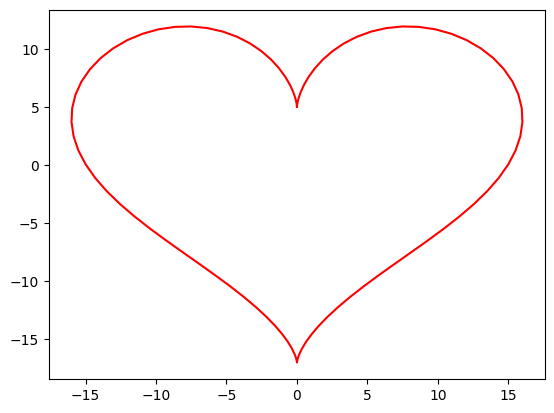

In [48]:
plt.plot(x.numpy(), y.numpy(), c='red');

## Автодифференцирование

The most important feature of PyTorch is that it can **differentiate (almost)

Пусть у нас есть функция $f(x) = x^2$. Если мы захотим подсчитать ее частную производную $\frac{\partial f}{\partial x}$, то нам понадобится всего три строчки:

In [64]:
x = torch.tensor(2.0, requires_grad=True)  # tells PyTorch that we'll need gradient of this tensor
x_2 = torch.tensor(3., requires_grad=True)
print(x.grad)
f_x = x ** 2  # run our function
f_new = x ** 2 + torch.sqrt(x_2)
f_y = x ** 3

None


In [65]:
x.grad is None

True

In [66]:
f_x.backward()  # calculate gradient

print("df/dx = {}".format(x.grad))
x.grad = None
f_y.backward()
print("df/dx = {}".format(x.grad))
x.grad = None
f_new.backward()
print("df/dx = {}".format(x.grad))
print("df/dx_2 = {}".format(x_2.grad))


df/dx = 4.0
df/dx = 12.0
df/dx = 4.0
df/dx_2 = 0.28867512941360474


In [85]:
labels = (torch.rand(1000) > 0.3).type(torch.long)
x = torch.randn(1000, 256)

In [142]:
def loss(y_hat, y):
    return -1.* torch.sum(y*torch.log(y_hat.clip(0.001, 0.999)) + (1 - y)*torch.log(1 - y_hat.clip(0.001, 0.999)))

def sigmoid(z):
    return 1./(1+torch.exp(-z))

In [147]:
w = torch.randn(1, 256, requires_grad=True)
losses = []
for i in range(5000):
    #w = torch.clone(w)
    y_hat = sigmoid(x @ w.t())
    loss_fn = loss(y_hat, labels)
    loss_fn.backward()
    w.requires_grad=False
    w -= 0.000000001 * w.grad
    w.requires_grad=True
    losses.append(loss_fn.item())


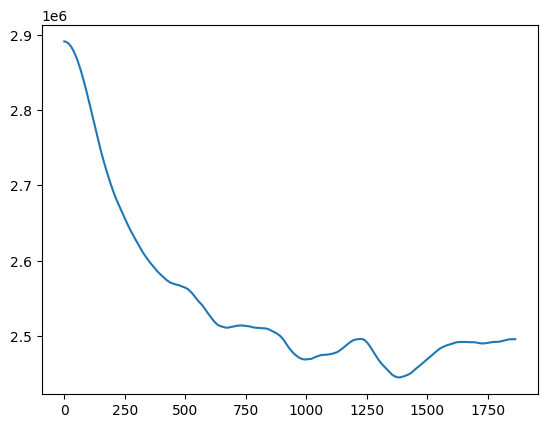

In [148]:
plt.plot(losses)

In [132]:
w.grad

<ipython-input-132-d01581d16022>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  w.grad


In [120]:
w.requires_grad

True

Суть в том, что в кач-ве $f(x)$ можно взять почти любую функцию (в том числе и нейросеть!). Для подробного изучения пакета можно почитать [мануал](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html).

## Simple linear regression.

Load data:

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

plt.scatter(boston.data[:, -1], boston.target)
plt.xlabel("x")
plt.ylabel("y");

Convert data to torch tensors:

In [ ]:
x = torch.from_numpy(boston.data[:, -1]).type(torch.float)
x = (x - x.mean()) / x.std()  # normalization

y = torch.from_numpy(boston.target).type(torch.float)

1-dimensional linear regression is formulated like this:
$$\normalsize y^{pred} = wx + b$$
where $x$ - is a feature, $w, b$ - model parameters (weight and bias), and $y^{pred}$ - model's prediction.

As a loss function we'll use **Mean Square Error** (MSE):
$$MSE(y, y^{pred}) = \frac{1}{N}\sum_{i=0}^{N-1}(y_{i} - y_{i}^{pred}) ^ 2$$
where $N$ - is a length of training set.

To train our model, we'll use **Gradient Descent** (GD):
$$\normalsize w_{i} = w_{i - 1} - \eta \frac{\partial loss}{\partial w_{i - 1}}$$

$$\normalsize b_{i} = b_{i - 1} - \eta \frac{\partial loss}{\partial b_{i - 1}}$$
where $\eta$ - is a learning rate.

But we're not going to calculate this partial derivative by hand. PyTorch will do it for us!

Declare model's parameters:

In [ ]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

Train loop:

In [ ]:
lr = 0.01
n_iters = 200

losses = []

for i in range(n_iters):
    # forward pass
    y_pred = w * x + b

    # calculate loss
    loss = torch.mean((y - y_pred) ** 2)
    losses.append(loss.item())

    # calculate gradients
    loss.backward()

    # make gradient step
    w.data = w.data - lr * w.grad.detach()  # detaching tensor from computational graph
    b.data = b.data - lr * b.grad.detach()  #

    # zero gradients (otherwise they'll accumulate)
    w.grad.zero_()
    b.grad.zero_()

    # visualization
    if i % 10 == 0:
        #clear_output(True)

        print("loss: {:.04}".format(loss.item()))

        # training set
        plt.scatter(x.numpy(), y.numpy())

        # our predictions
        plt.scatter(x.numpy(), y_pred.detach().numpy(), color='red')

        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()


plt.plot(losses)
plt.xlabel("iters")
plt.ylabel("loss");

## Accelerating PyTorch with GPU

A **Graphics Processing Unit (GPU)** is a specialized electronic circuit designed to rapidly perform single-type matematical calculations. And for playing computer games...


GPUs are built for doing same operation on multiple data efficiently. Machine learning algorithms (e.g. neural networks) usually consist of doing same operation (e.g. matrix multiplication) again and again, that's why GPUs are successfully applied for boosting algorithms' performance.

If you're lucky enough to have access to a CUDA-capable GPU (you can rent one for about about $0.50/hour from most cloud providers or utilize free Google Colab) you can use it to speed up your code. First check that your GPU is working in Pytorch:

In [ ]:
print(torch.cuda.is_available())

And then create a device object for it:

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

Now we can create tensor and transfer it to GPU:

In [ ]:
device

In [ ]:
x = torch.arange(0, 9, device=device).reshape(3, 3).type(torch.float)
#x = x.cuda()

print(x)

In [ ]:
!nvidia-smi

In [ ]:
y = torch.arange(0, 9).reshape(3, 3).type(torch.float)


In [ ]:
y.cuda() + x

In [ ]:
y + x.cpu()

If you have a GPU than you'll see that now `x` is a `cuda`-tensor.

Now let's multiply some large matricies on CPU and GPU to compare the speed:

In [ ]:
size = 1000

x = torch.arange(0, size ** 2).reshape(size, size).type(torch.float)
x_gpu = x.clone().to(device)

In [ ]:
x.device, x_gpu.device

In [ ]:
%%time
for i in range(20):
  _=x.mm(x)

In [ ]:
%%time
for i in range(20):
  _=x_gpu.mm(x_gpu)

if device == 'cuda':
    torch.cuda.synchronize()  # always add synchronize() when you measure GPU runtime

In [ ]:
!nvidia-smi

As you can see, we can get dramatic boost of speed using GPU!

Note, we can't compute operations with tensors located on different devices:

In [ ]:
try:
    x.mm(x_gpu)
except RuntimeError as e:
    print("Tensors are located on different devices!")
    print(e)

In [ ]:
try:
    x_gpu.mm(x)
except RuntimeError as e:
    print("Tensors are located on different devices!")
    print(e)

In [ ]:
x = torch.randn(100,100, device='cpu')

In [ ]:
y = torch.randn(99,99, device='cpu')

In [ ]:
x.mm(y)

In [ ]:
try:
    x.mm(x_gpu)
except RuntimeError as e:
    print("Tensors are located on different devices!")
    print(e)

In [ ]:
0.9 ** 20